<a href="https://colab.research.google.com/github/lrsilsbee/Machine-Learning/blob/main/Lauren_Silsbee_feature_engineering_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize
import warnings

warnings.filterwarnings('ignore')
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

performance_df = pd.read_sql_query('select * from studentsperformance',con=engine)
engine.dispose()

Question 1: Are the exam score variables normally distributed? If not, apply a Box-Cox transformation. Does anything change?

(15.912256686712709, 0.0003505075386818213)
NormaltestResult(statistic=15.408960513931822, pvalue=0.00045080293869937836)
No, this is not a normal distribution
(1.7200982636836308, 0.42314129209599327)
Yes, this is normal now. The Box Cox helped.


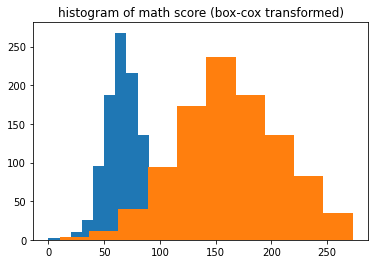

In [ ]:
#Math

plt.hist(performance_df["math score"])
plt.title("histogram of math score")
plt.show

from scipy.stats import jarque_bera
from scipy.stats import normaltest

print(jarque_bera(performance_df["math score"]))
print(normaltest(performance_df["math score"]))
print("No, this is not a normal distribution")

#Box Cox

from scipy.stats import boxcox

#There was an error saying "values must be positive" so I had to exclude 0s
math_boxcox,_ = boxcox(performance_df[performance_df["math score"] > 0]["math score"])


plt.hist(math_boxcox)
plt.title("histogram of math score (box-cox transformed)")
plt.show
#It looks more normal, let's check 

print(jarque_bera(math_boxcox))
print("Yes, this is normal now. The Box Cox helped.")

(11.383300575987892, 0.0033740202672214448)
NormaltestResult(statistic=11.11741279628622, pvalue=0.003853758403576582)
No, this is not a normal distribution
(4.119778573559666, 0.127468081515408)
Yes, this is normal now. The Box Cox helped.


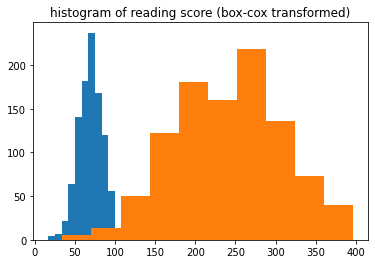

In [ ]:
#Reading 

plt.hist(performance_df["reading score"])
plt.title("histogram of reading score")
plt.show


print(jarque_bera(performance_df["reading score"]))
print(normaltest(performance_df["reading score"]))
print("No, this is not a normal distribution")

#Box Cox
#There was an error saying "values must be positive" so I had to exclude 0s
reading_boxcox,_ = boxcox(performance_df["reading score"])

plt.hist(reading_boxcox)
plt.title("histogram of reading score (box-cox transformed)")
plt.show
#It looks more normal, let's check 

print(jarque_bera(reading_boxcox))
print("Yes, this is normal now. The Box Cox helped.")

(13.98509448257235, 0.0009187033894586527)
NormaltestResult(statistic=13.606450837263859, pvalue=0.0011101885439899974)
No, this is not a normal distribution
(4.746478090042761, 0.09317842784043195)
Yes, this is normal now. The Box Cox helped.


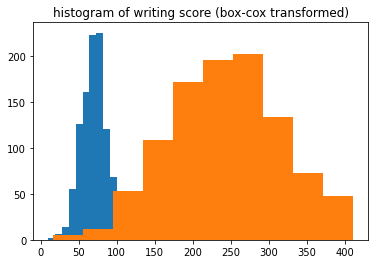

In [ ]:
#Writing 
plt.hist(performance_df["writing score"])
plt.title("histogram of writing score")
plt.show


print(jarque_bera(performance_df["writing score"]))
print(normaltest(performance_df["writing score"]))
print("No, this is not a normal distribution")

#Box Cox
#There was an error saying "values must be positive" so I had to exclude 0s
writing_boxcox,_ = boxcox(performance_df["writing score"])

plt.hist(writing_boxcox)
plt.title("histogram of writing score (box-cox transformed)")
plt.show
#It looks more normal, let's check 

print(jarque_bera(writing_boxcox))
print("Yes, this is normal now. The Box Cox helped.")

Question 2: Say we want to use a single variable for the exam scores as our target. For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed. If it's not normally distributed, apply a Box-Cox transformation and check whether or not the transformed variable is normally distributed.

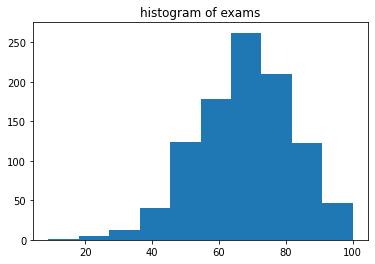

(15.453387913085168, 0.00044089934264401887)
NormaltestResult(statistic=15.186721327231322, pvalue=0.0005037851534494478)
This new variable is not normally distributed.


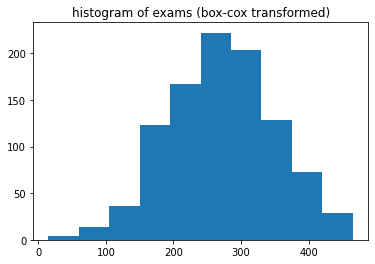

(2.4353989331279, 0.2959101356398447)
NormaltestResult(statistic=2.779857602227616, pvalue=0.24909303914726724)
The variable is now normal.


In [ ]:
# Combine all the variables

exams = ((performance_df["math score"] +
              performance_df["reading score"] + performance_df["writing score"])/3)

plt.hist(exams)
plt.title("histogram of exams")
plt.show()
print(jarque_bera(exams))
print(normaltest(exams))
print("This new variable is not normally distributed.")

#transform it


exams_boxcox,_ = boxcox(exams)

plt.hist(exams_boxcox)
plt.title("histogram of exams (box-cox transformed)")
plt.show()

print(jarque_bera(exams_boxcox))
print(normaltest(exams_boxcox))
print('The variable is now normal.')

Question 3: Which variables seem related to the target variable (the newly created variable in the previous question)? If our goal is to explain the determinants of success in exams, which variables in our dataset might be useful?

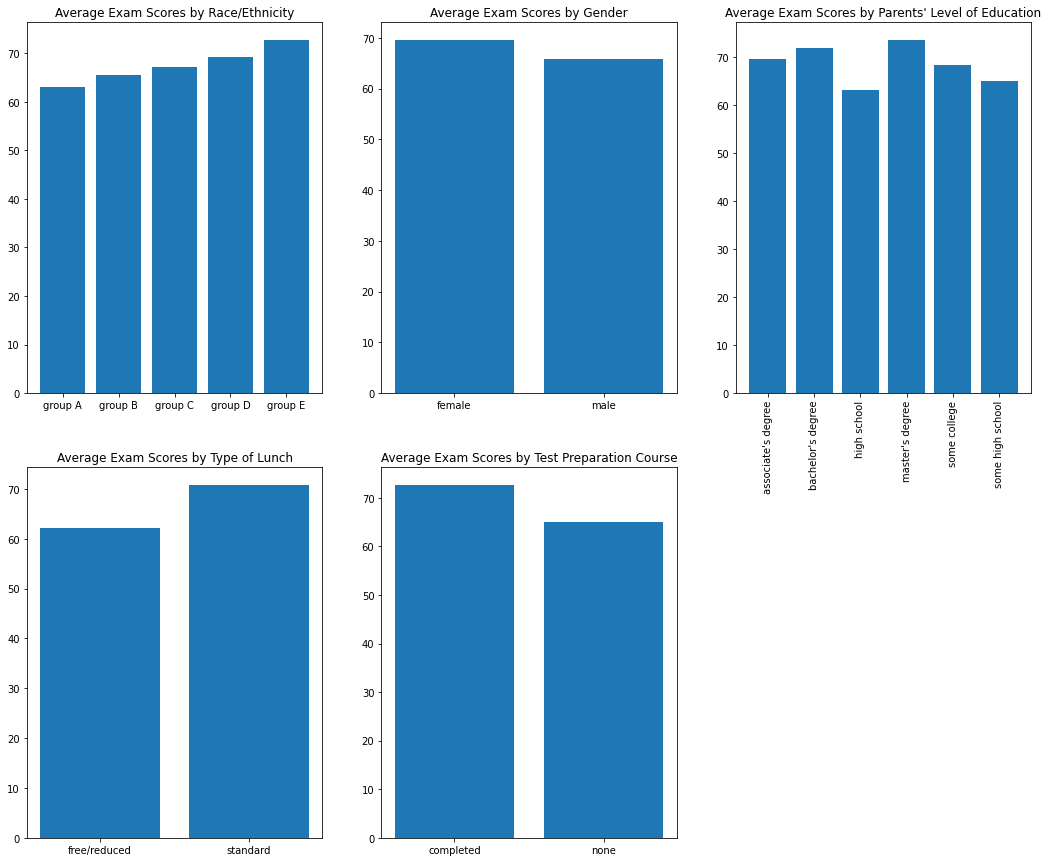

In [ ]:
#Target variable is exams_boxcox

#Add it to the df
plt.figure(figsize=(18, 15))

performance_df["exams"] = exams

#Look for relationships 
plt.subplot(2, 3, 1)
plt.bar(performance_df.groupby("race/ethnicity")
        ["exams"].mean().index, performance_df.groupby("race/ethnicity")["exams"].mean())

plt.title("Average Exam Scores by Race/Ethnicity")

plt.subplot(2, 3, 2)
plt.bar(performance_df.groupby("gender")
        ["exams"].mean().index, performance_df.groupby("gender")["exams"].mean())

plt.title("Average Exam Scores by Gender")

plt.subplot(2, 3, 3)
plt.bar(performance_df.groupby("parental level of education")
        ["exams"].mean().index, performance_df.groupby("parental level of education")["exams"].mean())

plt.title("Average Exam Scores by Parents' Level of Education")
plt.xticks(rotation="vertical")


plt.subplot(2, 3, 4)
plt.bar(performance_df.groupby("lunch")
        ["exams"].mean().index, performance_df.groupby("lunch")["exams"].mean())

plt.title("Average Exam Scores by Type of Lunch")


plt.subplot(2, 3, 5)
plt.bar(performance_df.groupby("test preparation course")
        ["exams"].mean().index, performance_df.groupby("test preparation course")["exams"].mean())

plt.title("Average Exam Scores by Test Preparation Course")

plt.show()

It seems like all the variables are related to the target variable. The above bar graphs show that the variables differ on the target variable (e.g., females score higher than males, certain ethnic groups score higher than others, etc.).